# Analysis of the Wrong Predictions

In this document, we will look at incorrect predictions of the XGB+C model.

## Import the Data

In [1]:
import sys
import os

# Append parent directory to path
sys.path.append("..")

# Change to parent directory
os.chdir("..")

In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from lib.load_dataset import get_original_dataset, get_ready_data

sns.set_theme()
pd.set_option("display.max_columns", 200)

DATA_FILE = "data/wrong_preds_cross_val_2019_2022.csv"

data_by_expert = get_original_dataset(which="2022")
data_ready = get_ready_data(which="2022")

data = pd.read_csv(DATA_FILE)

data.shape

(3297, 125)

In [5]:
data["true_value"].value_counts(normalize=True)

true_value
0    0.641492
1    0.358508
Name: proportion, dtype: float64

### UnknownCount

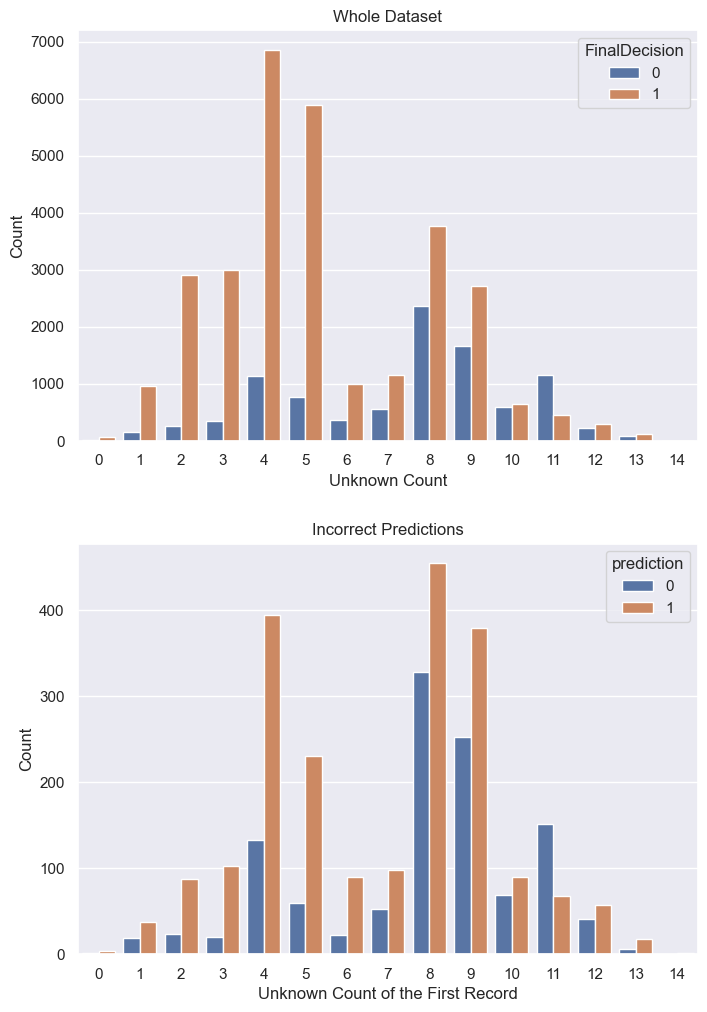

In [6]:
_, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

sns.countplot(data=data_ready,
              x="UnknownCount",
              hue="FinalDecision",
              ax=axes[0],
)

axes[0].set_title("Whole Dataset")
axes[0].set_xlabel("Unknown Count")
axes[0].set_ylabel("Count")

sns.countplot(
    data=data,
    x="UnknownCount_0",
    ax=axes[1],
    hue="prediction",
    # multiple="stack",
)

axes[1].set_title("Incorrect Predictions")
axes[1].set_xlabel("Unknown Count of the First Record")
axes[1].set_ylabel("Count")

plt.subplots_adjust(hspace=0.25)

Probability of accepting the first record for records with 8-9 unknowns


<Axes: >

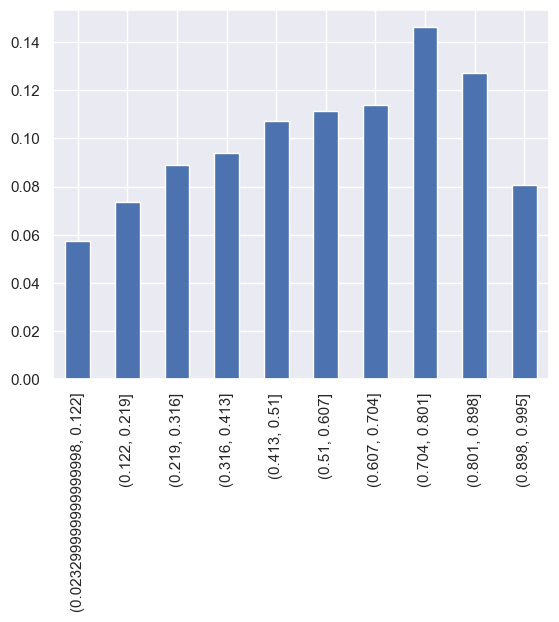

In [93]:
tmp = data[data["UnknownCount_0"].between(8, 9)]
print("Probability of accepting the first record for records with 8-9 unknowns")
tmp["probability"].value_counts(bins=10, normalize=True).sort_index().plot(kind="bar")

### ICD

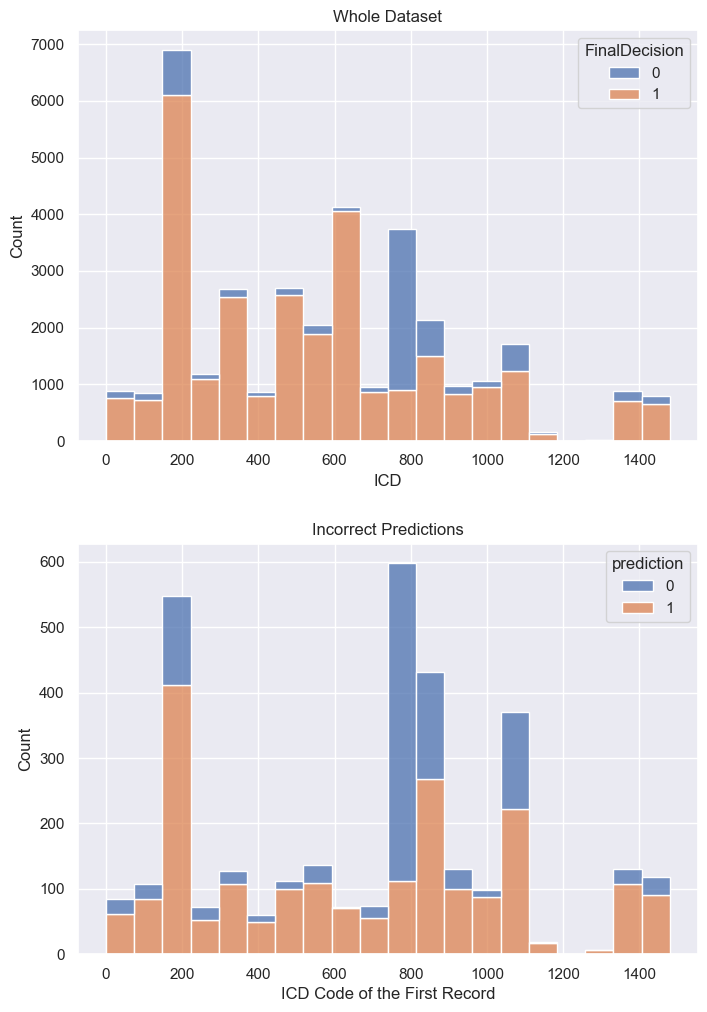

In [94]:
_, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

sns.histplot(
    data=data_ready[data_ready["AlgoFiltered"] == 0],
    x="ICD",
    hue="FinalDecision",
    multiple="stack",
    bins=20,
    ax=axes[0],
)

sns.histplot(
    data=data,
    x="ICD_0",
    hue="prediction",
    multiple="stack",
    bins=20,
    ax=axes[1],
)

axes[0].set_title("Whole Dataset")
axes[1].set_title("Incorrect Predictions")
axes[1].set_xlabel("ICD Code of the First Record")

plt.subplots_adjust(hspace=0.25)

In [8]:
data[data["ICD_0"].between(760, 800)]["prediction"].value_counts(normalize=True)

prediction
0    0.831889
1    0.168111
Name: proportion, dtype: float64

In [9]:
data[data["ICD_0"] == 1050]["ICD_1"].value_counts(normalize=True)

ICD_1
500    0.988417
830    0.003861
540    0.003861
440    0.003861
Name: proportion, dtype: float64

In [10]:
data[data["ICD_0"].between(1050, 1100)]["ICD_0"].value_counts(
    normalize=True, 
)

ICD_0
1050    0.698113
1070    0.123989
1060    0.115903
1090    0.061995
Name: proportion, dtype: float64

In [11]:
data[data["ICD_0"] == 1050]["ICDLoc_0"].value_counts(
    normalize=True, 
)

ICDLoc_0
 1    0.756757
 0    0.111969
-2    0.100386
 7    0.030888
Name: proportion, dtype: float64

In [12]:
data[data["ICD_0"].between(760, 800)]["true_value"].value_counts(normalize=True)

true_value
1    0.831889
0    0.168111
Name: proportion, dtype: float64

In [13]:
data[data["ICD_0"] == 850]["true_value"].value_counts(normalize=True)

true_value
1    0.558685
0    0.441315
Name: proportion, dtype: float64

In [14]:
data_ready[data_ready["ICD"] == 1050]["FinalDecision"].value_counts(normalize=True)

FinalDecision
1    0.556021
0    0.443979
Name: proportion, dtype: float64

In [15]:
data[data["ICD_0"] == 1050]["true_value"].value_counts(normalize=True)

true_value
0    0.509653
1    0.490347
Name: proportion, dtype: float64

In [16]:
data[data["ICD_0"] == 1050].shape[0] / data.shape[0]

0.07855626326963906

In [86]:
data["ICD_0"].value_counts(bins=20, normalize=True)#.sort_index()

(740.0, 814.0]                 0.178951
(148.0, 222.0]                 0.166212
(814.0, 888.0]                 0.130725
(1036.0, 1110.0]               0.112527
(518.0, 592.0]                 0.041250
(1332.0, 1406.0]               0.039733
(888.0, 962.0]                 0.039430
(296.0, 370.0]                 0.039126
(1406.0, 1480.0]               0.035790
(444.0, 518.0]                 0.033970
(74.0, 148.0]                  0.032454
(962.0, 1036.0]                0.029724
(-1.4809999999999999, 74.0]    0.025478
(666.0, 740.0]                 0.024871
(592.0, 666.0]                 0.022141
(222.0, 296.0]                 0.022141
(370.0, 444.0]                 0.017895
(1110.0, 1184.0]               0.005460
(1258.0, 1332.0]               0.002123
(1184.0, 1258.0]               0.000000
Name: proportion, dtype: float64

<Axes: ylabel='Frequency'>

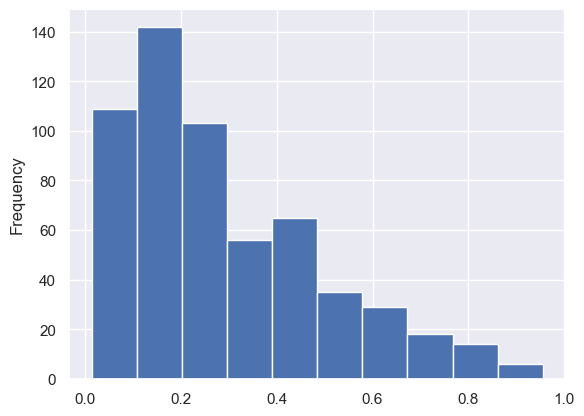

In [ ]:
data[data["ICD_0"].between(760, 800)]["probability"].plot.hist(bins=10)

In [ ]:
data_by_expert[data_by_expert["DgKod"].between("C760", "C809")].shape

(3896, 80)

### Missing Features

#### Incorrect predictions

In [95]:
isnull_data = (data.loc[:, ~data.columns.str.contains("_Diff_")] < 0).astype(
    int
)

isnull_data = isnull_data.loc[:, ~isnull_data.columns.str.contains("_1|_2", regex=True)]

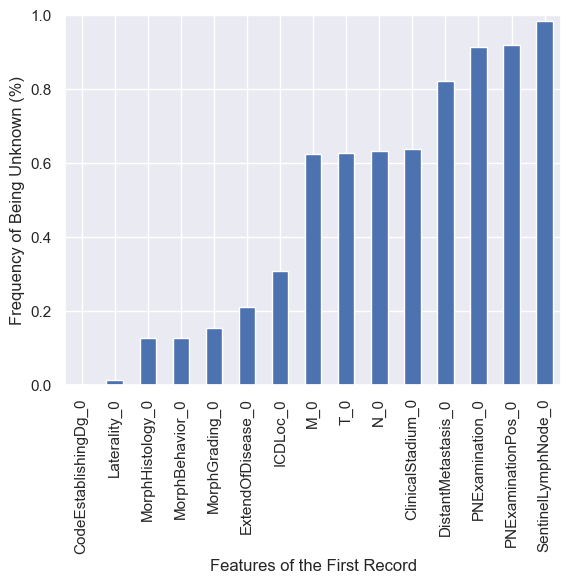

In [96]:
with pd.option_context('future.no_silent_downcasting', True):
    null_cols = isnull_data.sum()

_, ax = plt.subplots()
ax.set_xlabel("Features of the First Record")
ax.set_ylabel("Frequency of Being Unknown (%)")
ax.set_ylim([0, 1])
(null_cols[null_cols > 0] / data.shape[0]).sort_values().plot(kind="bar", ax=ax)
None

#### Whole dataset

<Axes: >

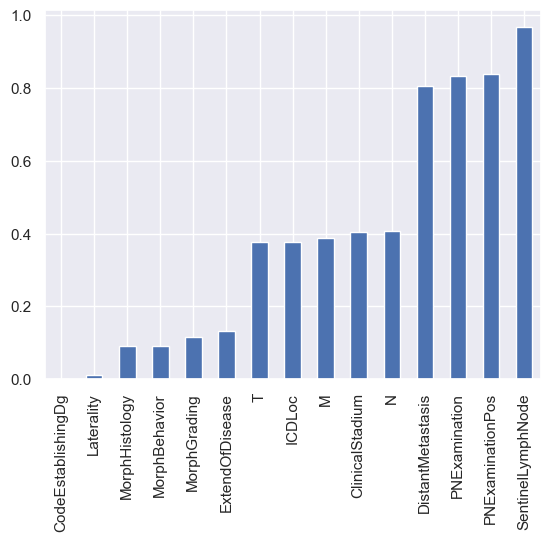

In [100]:
tmp = data_ready[data_ready < 0].count()
(tmp[tmp > 0] / data_ready.shape[0]).sort_values().plot(kind="bar")

In [102]:
data[data["true_value"] != data["vyporadani_predtym"]]["probability"].value_counts(bins=3)

(0.0131, 0.176]    92
(0.176, 0.338]     86
(0.338, 0.499]     85
Name: count, dtype: int64

In [99]:
# Get the most frequent ICD codes for the wrong predictions 
# where the label was updated
data[data["true_value"] != data["vyporadani_predtym"]]["ICD_0"].value_counts(normalize=True).head()

ICD_0
780     0.441065
790     0.152091
770     0.106464
850     0.072243
1050    0.068441
Name: proportion, dtype: float64

## Row Similarity

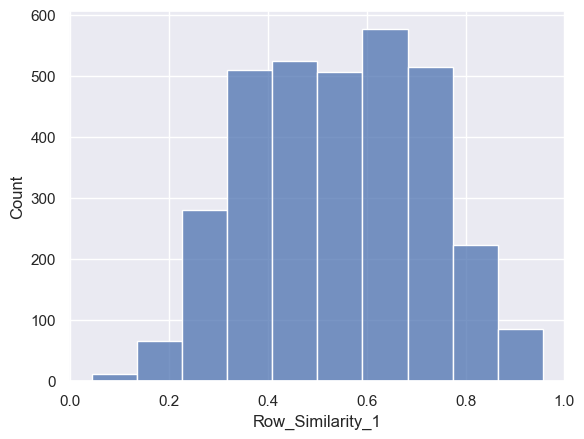

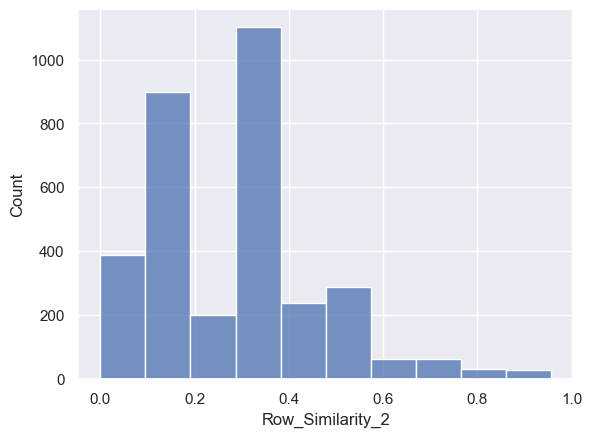

In [43]:
for i in range(1, 3):
    plt.figure()
    sns.histplot(data[f"Row_Similarity_{i}"], bins=10)

In [44]:
data["RecordCount_0"].value_counts()

RecordCount_0
2    2720
3     577
Name: count, dtype: int64

In [45]:
data["true_value"].value_counts()

true_value
0    2115
1    1182
Name: count, dtype: int64

## Probability

Text(0.5, 0, 'Probability of Accepting a Record')

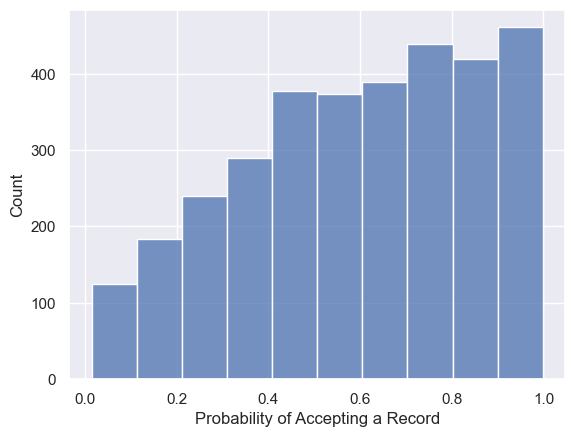

In [46]:
_, ax = plt.subplots()

sns.histplot(data["probability"], bins=10, ax=ax)

ax.set_xlabel("Probability of Accepting a Record")

<Axes: xlabel='probability', ylabel='Count'>

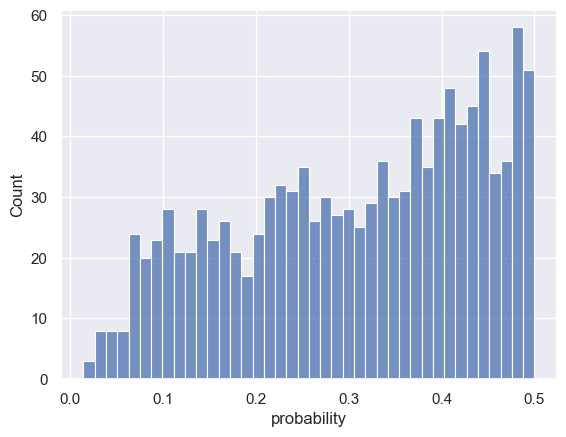

In [47]:
sns.histplot(data[data["true_value"] == 1]["probability"], bins=40)

<Axes: xlabel='probability', ylabel='Count'>

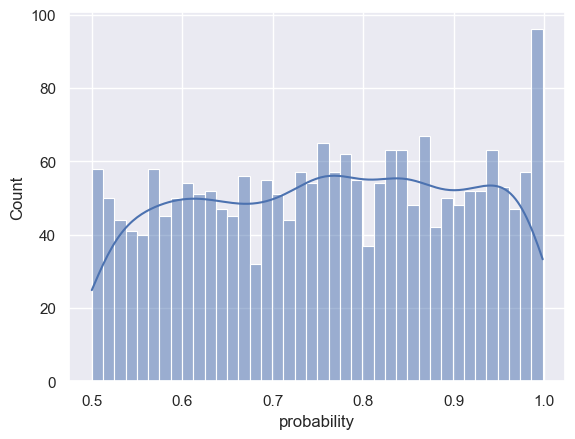

In [48]:
sns.histplot(data[data["true_value"] == 0]["probability"], bins=40, kde=True)

In [49]:
data["probability"].describe()

count    3297.000000
mean        0.597449
std         0.258187
min         0.014552
25%         0.404989
50%         0.619974
75%         0.819032
max         0.998288
Name: probability, dtype: float64

In [50]:
data["probability"].value_counts(bins=10).sort_index()

(0.0126, 0.113]    124
(0.113, 0.211]     183
(0.211, 0.31]      240
(0.31, 0.408]      290
(0.408, 0.506]     378
(0.506, 0.605]     374
(0.605, 0.703]     389
(0.703, 0.802]     439
(0.802, 0.9]       419
(0.9, 0.998]       461
Name: count, dtype: int64

## Two Records

In [60]:
data_two_recs = data[data["RecordCount_0"] == 2]
two_from_data = data_ready[
    data_ready["RecordId"].isin(data_two_recs["RecordId_0"])
]

data_two_recs.shape

(2720, 125)

In [61]:
two_from_data.shape

(2720, 29)

In [62]:
(two_from_data < 0).sum(axis=1).value_counts().head(5)

8     632
9     524
4     447
5     253
11    161
Name: count, dtype: int64

In [64]:
# Count the number of missing values in each column
tmp = pd.DataFrame((two_from_data < 0).sum()).T

# Drop columns with no missing values
tmp.drop(columns=tmp.columns[tmp.eq(0).all()], inplace=True)
tmp

,PNExamination,PNExaminationPos,SentinelLymphNode,MorphGrading,ClinicalStadium,ExtendOfDisease,DistantMetastasis,ICDLoc,Laterality,MorphHistology,MorphBehavior,T,N,M
0,2474,2484,2670,401,1709,574,2242,858,37,320,324,1669,1694,1669


In [67]:
data_two_recs["Row_Similarity_1"].value_counts(bins=10).sort_index()

(0.0416, 0.135]      8
(0.135, 0.226]      45
(0.226, 0.317]     226
(0.317, 0.409]     404
(0.409, 0.5]       421
(0.5, 0.591]       429
(0.591, 0.683]     491
(0.683, 0.774]     455
(0.774, 0.865]     178
(0.865, 0.957]      63
Name: count, dtype: int64

<Axes: xlabel='Row_Similarity_1', ylabel='Count'>

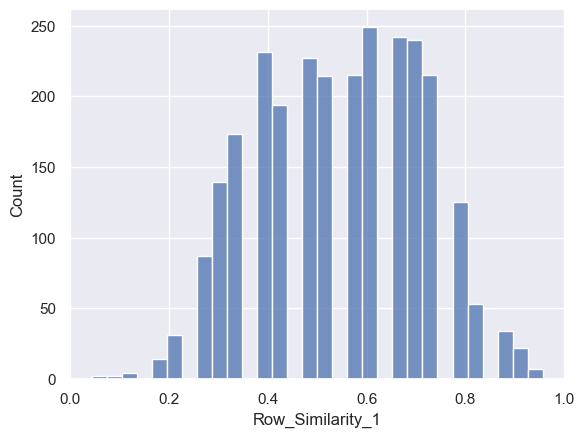

In [68]:
sns.histplot(data_two_recs["Row_Similarity_1"], bins=30)

<Axes: xlabel='probability', ylabel='Count'>

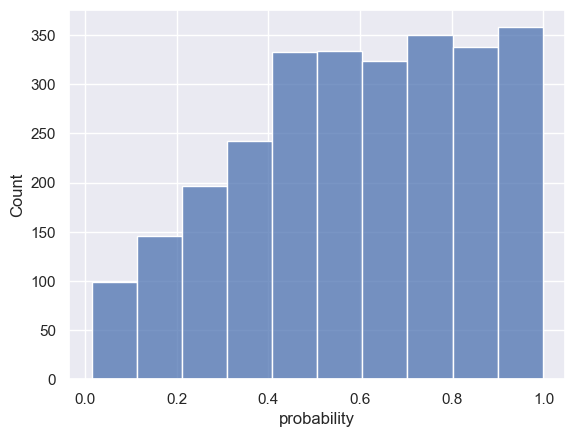

In [70]:
sns.histplot(data_two_recs["probability"], bins=10)

In [71]:
data_two_recs["probability"].value_counts(bins=5).sort_index()

(0.0126, 0.211]    245
(0.211, 0.408]     438
(0.408, 0.605]     667
(0.605, 0.802]     674
(0.802, 0.998]     696
Name: count, dtype: int64

<Axes: xlabel='Row_Similarity_1', ylabel='Count'>

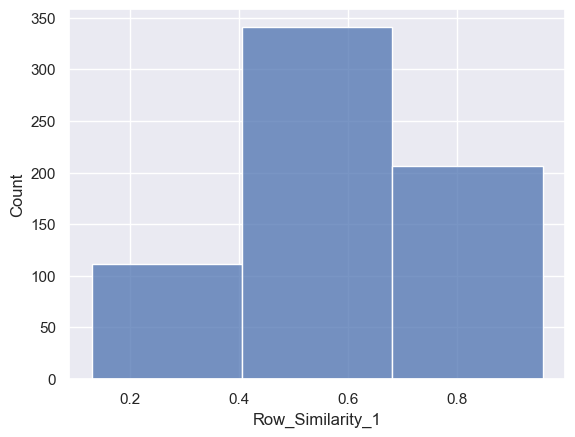

In [72]:
sns.histplot(
    data_two_recs[data_two_recs["probability"].between(0.408, 0.603)][
        "Row_Similarity_1"
    ],
    bins=3,
)

In [73]:
data_two_recs[data_two_recs["probability"].between(0.408, 0.603)][
    "Row_Similarity_1"
].value_counts(bins=4).sort_index()

(0.129, 0.337]     37
(0.337, 0.543]    229
(0.543, 0.75]     318
(0.75, 0.957]      74
Name: count, dtype: int64

## False Positives

In [74]:
data_fp = data[data["true_value"] == 0]

In [75]:
data_fp.shape

(2115, 125)

<Axes: xlabel='probability', ylabel='Count'>

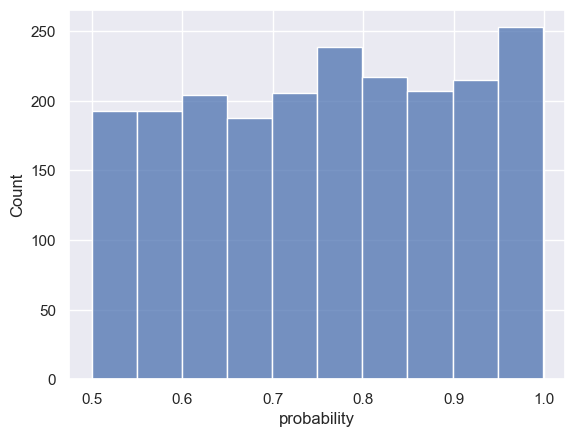

In [77]:
sns.histplot(data_fp["probability"], bins=10)

In [78]:
data_fp["probability"].value_counts(bins=5).sort_index()

(0.499, 0.6]      386
(0.6, 0.699]      392
(0.699, 0.799]    445
(0.799, 0.899]    424
(0.899, 0.998]    468
Name: count, dtype: int64

<Axes: xlabel='Row_Similarity_1', ylabel='Count'>

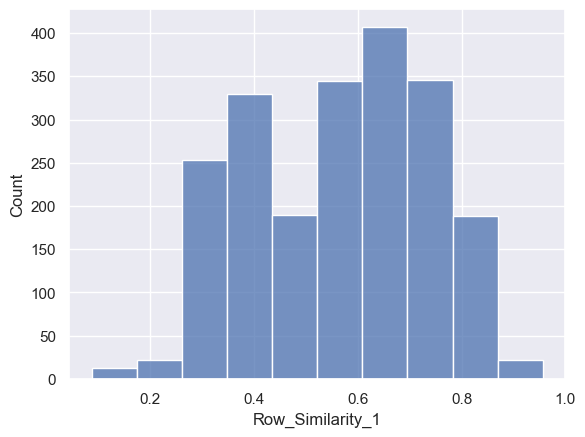

In [80]:
sns.histplot(data_fp["Row_Similarity_1"], bins=10)

In [82]:
data_fp["Row_Similarity_1"].value_counts(bins=10).sort_index()

(0.0851, 0.174]     13
(0.174, 0.261]      68
(0.261, 0.348]     207
(0.348, 0.435]     329
(0.435, 0.522]     356
(0.522, 0.609]     377
(0.609, 0.696]     391
(0.696, 0.783]     269
(0.783, 0.87]       83
(0.87, 0.957]       22
Name: count, dtype: int64